In [1]:
import pandas as pd #data processing, CSV files I/O
import numpy as np  #linear algebra
import seaborn as sns #plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

%matplotlib inline
init_notebook_mode(connected=True)

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Import K nearest Neighbors Model
from sklearn.neighbors import KNeighborsClassifier
#Import Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
#Import Logistic Regression Model
from sklearn.linear_model import LogisticRegression

In [2]:
#read the csv files
df_apps = pd.read_csv('./google-play-store-apps/googleplaystore.csv')

In [3]:
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
#find total number of null values for any particular column
df_apps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
categories = list(df_apps["Category"].unique())
print("There are {0:.0f} categories! (Excluding/Removing Category 1.9)".format(len(categories)-1))
print(categories)
#Remove Category 1.9
categories.remove('1.9')

There are 33 categories! (Excluding/Removing Category 1.9)
['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL', 'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL', 'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', '1.9']


In [7]:
a = df_apps.loc[df_apps["Category"] == "1.9"]
print(a.head())
print("This mislabeled app category affects {} app at index {}.".format(len(a),int(a.index.values)))
df_apps = df_apps.drop(int(a.index.values),axis=0)

                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN  
This mislabeled app category affects 1 app at index 10472.


In [8]:
#number of rating with null values
df_apps['Rating'].isnull().sum()

1474

In [9]:
#dropping null values
df_apps = df_apps.drop(df_apps[df_apps['Rating'].isnull()].index, axis=0)

In [10]:
#List of all unique categories
categ = list(df_apps["Category"].unique())
print("There are {0:.0f} categories!".format(len(categ)-1))
print(categ)


There are 32 categories!
['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL', 'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL', 'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']


# Data Visualization

In [11]:
# Number of Apps vs Ratings
layout = go.Layout(
    xaxis=dict(title='Ratings'),yaxis=dict(title='Number of Apps'))
data = [go.Histogram(x=df_apps["Rating"])]
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic histogram')

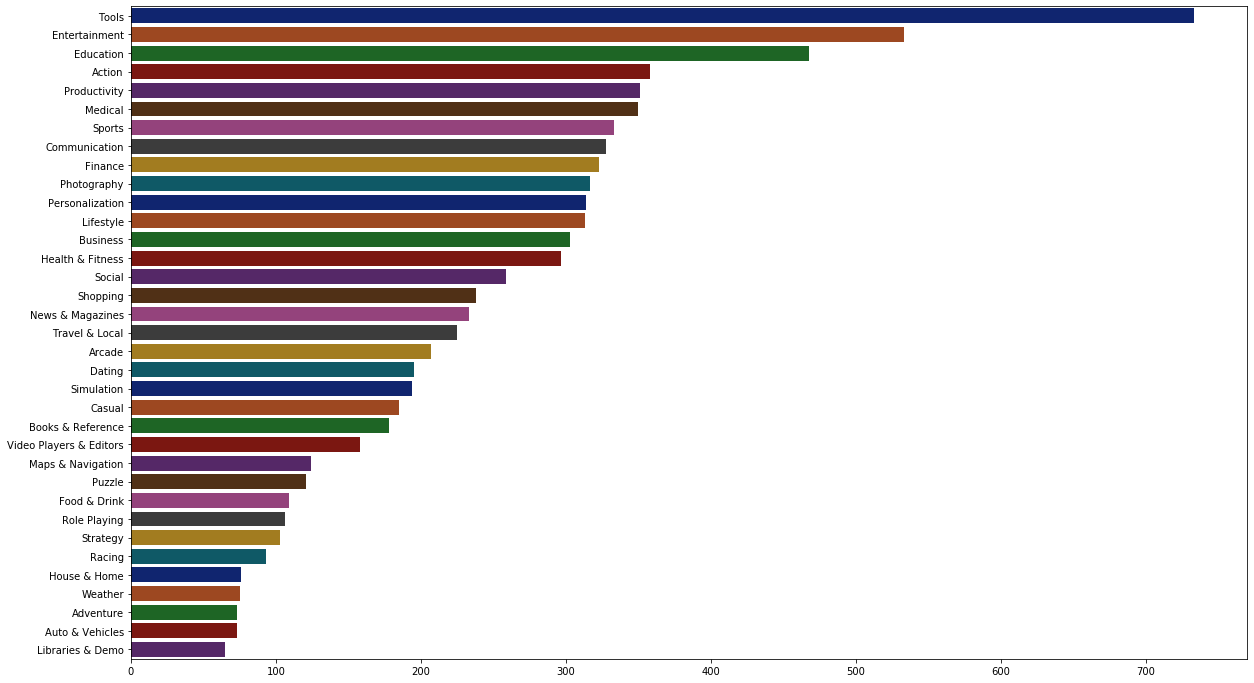

In [12]:
#Show top 35 app genres
plt.figure(figsize=(20, 12))
genres = df_apps["Genres"].value_counts()[:35]
ax = sns.barplot(x=genres.values, y=genres.index, palette="dark")

Top generes include Tools, Enterntainment, Education,Buisness and Medical

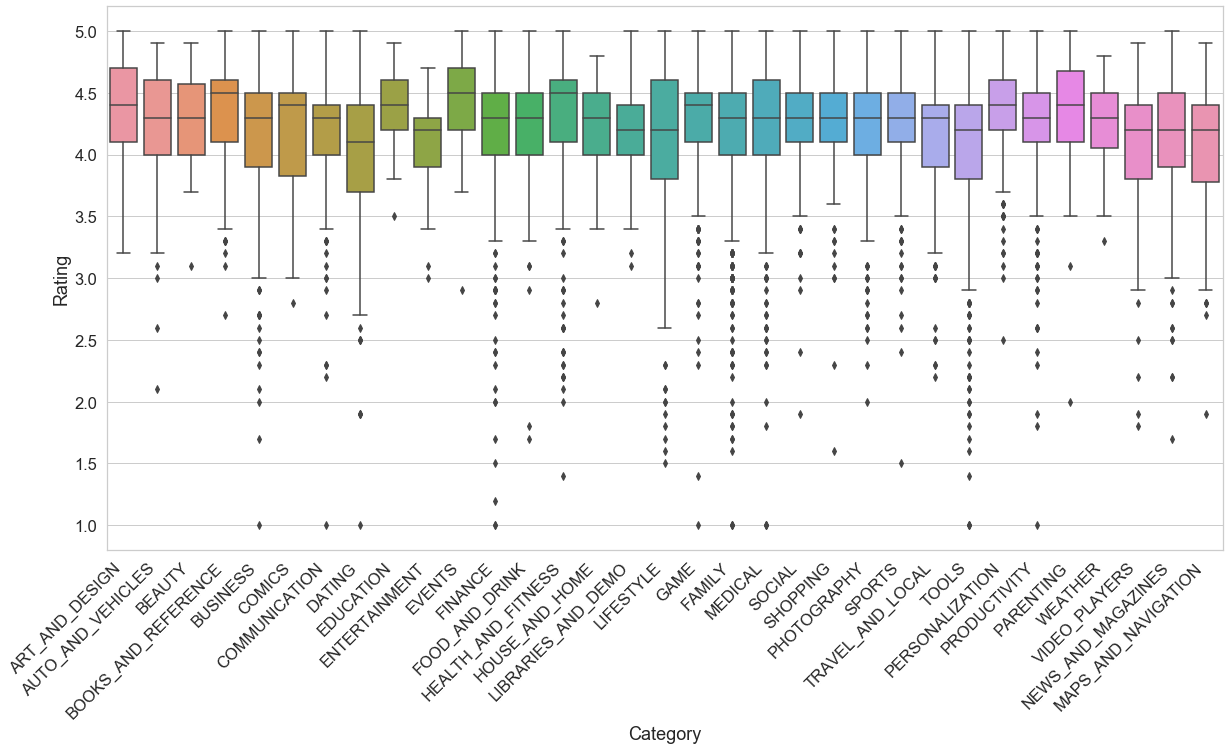

In [13]:
#Finding categories with best overall rating and most installs
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.5, style='whitegrid')
ax = sns.boxplot(x="Category",y="Rating",data=df_apps)
labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')

Since all categories have close rating. In order to find which categores are highest rated, we will only look at the data that has more than or equal to 4.0 in rating

In [14]:
#removing rows with rating < 4.0
highRating = df_apps.copy()
highRating = highRating.loc[highRating["Rating"] >= 4.0]
highRateNum = highRating.groupby('Category')['Rating'].nunique()
highRateNum

Category
ART_AND_DESIGN         10
AUTO_AND_VEHICLES       8
BEAUTY                 10
BOOKS_AND_REFERENCE    11
BUSINESS               11
COMICS                 10
COMMUNICATION          10
DATING                 11
EDUCATION              10
ENTERTAINMENT           8
EVENTS                 11
FAMILY                 11
FINANCE                11
FOOD_AND_DRINK         10
GAME                   11
HEALTH_AND_FITNESS     11
HOUSE_AND_HOME          9
LIBRARIES_AND_DEMO      9
LIFESTYLE              11
MAPS_AND_NAVIGATION    10
MEDICAL                11
NEWS_AND_MAGAZINES     11
PARENTING              11
PERSONALIZATION        11
PHOTOGRAPHY            11
PRODUCTIVITY           11
SHOPPING               10
SOCIAL                 11
SPORTS                 11
TOOLS                  11
TRAVEL_AND_LOCAL       10
VIDEO_PLAYERS          10
WEATHER                 9
Name: Rating, dtype: int64

From above we can see that the categories of importance are "ENTERTAINMENT" and "AUTO_AND_VEHICLE"

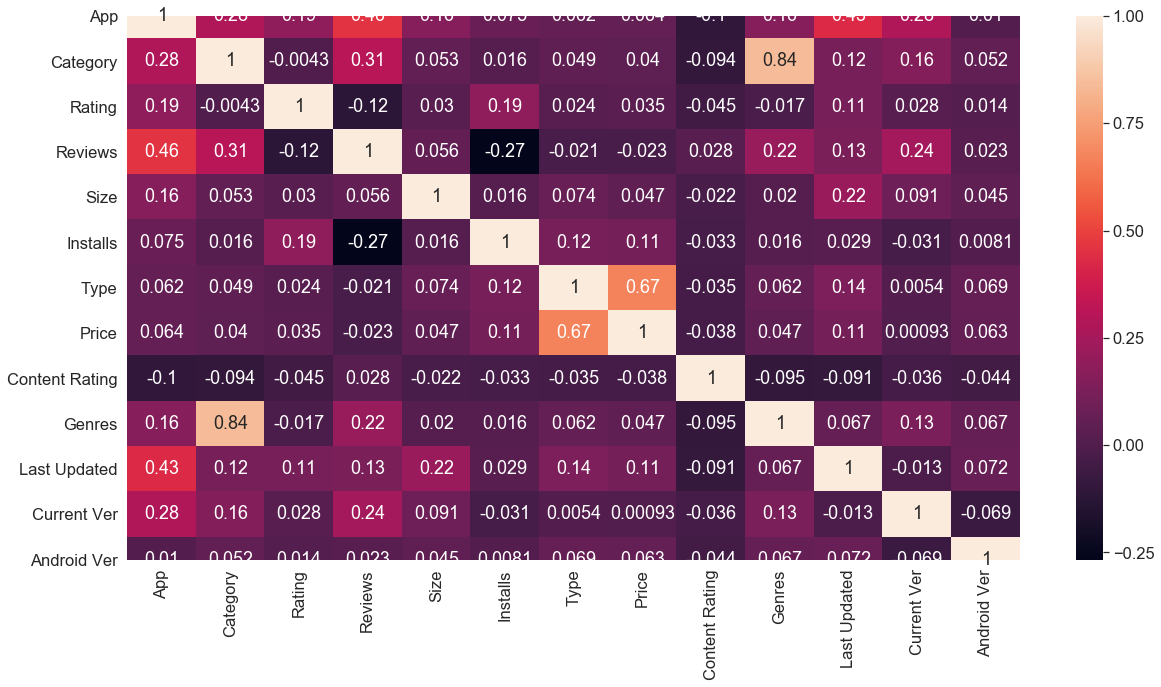

In [15]:
df_apps.dtypes
df_apps["Type"] = (df_apps["Type"] == "Paid").astype(int)
corr = df_apps.apply(lambda x: x.factorize()[0]).corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot=True)

Above we can see that installs and reviews has the strongest inverse correlation

In [16]:

col = "Type"
grouped = df_apps[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0])
layout = {'title': 'Target(0 = No, 1 = Yes)'}
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

Here we see that 92.6% of the apps are free and 7.37% of apps are paid which proves that free apps are more used

In [17]:

col = "Category"
grouped = df_apps[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0])
layout = {'title': 'Target(0 = No, 1 = Yes)'}
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

The most numbers of apps on app store belongs under the category of Family and Game

In [18]:
#Extract App, Installs, & Content Rating from df_apps
popApps = df_apps.copy()
popApps = popApps.drop_duplicates()
#Remove characters preventing values from being floats and integers

popApps["Price"] = popApps["Price"].str.replace("$","")
popApps["Price"] = popApps["Price"].astype("float64")
popApps["Installs"] = popApps["Installs"].str.replace("+","") 
popApps["Installs"] = popApps["Installs"].str.replace(",","")
popApps["Installs"] = popApps["Installs"].astype("int64")
popApps["Size"] = popApps["Size"].str.replace("Varies with device","0")
popApps["Size"] = (popApps["Size"].replace(r'[kM]+$', '', regex=True).astype(float) *\
        popApps["Size"].str.extract(r'[\d\.]+([kM]+)', expand=False).fillna(1).replace(['k','M'], [10**3, 10**6]).astype(int))
popApps["Reviews"] = popApps["Reviews"].astype("int64")

popApps = popApps.sort_values(by="Installs",ascending=False)
popApps.reset_index(inplace=True)
popApps.drop(["index"],axis=1,inplace=True)
popApps.loc[:40,['App','Installs','Content Rating']]

,App,Installs,Content Rating
0,Messenger – Text and Video Chat for Free,1000000000,Everyone
1,Google Drive,1000000000,Everyone
2,Instagram,1000000000,Teen
3,Google,1000000000,Everyone
4,Instagram,1000000000,Teen
5,Google+,1000000000,Teen
6,Subway Surfers,1000000000,Everyone 10+
7,Maps - Navigate & Explore,1000000000,Everyone
8,Google,1000000000,Everyone
9,Hangouts,1000000000,Everyone


In [19]:
#To find sucess of app we will define 1000 as threshold point. If installs are greater than threshold, they will be considered succesful and less than threshold will be considered unsuccesful

popAppsCopy = popApps.copy()
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Category'. 
popAppsCopy['Category']= label_encoder.fit_transform(popAppsCopy['Category']) 
popAppsCopy['Content Rating']= label_encoder.fit_transform(popAppsCopy['Content Rating']) 
popAppsCopy['Genres']= label_encoder.fit_transform(popAppsCopy['Genres']) 
popAppsCopy.dtypes

App                object
Category            int64
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type                int64
Price             float64
Content Rating      int64
Genres              int64
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [20]:
#dropping unncessary data
popAppsCopy = popAppsCopy.drop(["App","Last Updated","Current Ver","Android Ver"],axis=1)
print("There are {} total rows.".format(popAppsCopy.shape[0]))
countPop = popAppsCopy[popAppsCopy["Installs"] > 100000].count()
print("{} Apps are Popular!".format(countPop[0]))
print("{} Apps are Unpopular!\n".format((popAppsCopy.shape[0]-countPop)[0]))
print("For an 80-20 training/test split, we need about {} apps for testing\n".format(popAppsCopy.shape[0]*.20))
popAppsCopy["Installs"] = (popAppsCopy["Installs"] > 100000)*1 #Installs Binarized

testPop1 = popAppsCopy[popAppsCopy["Installs"] == 1].sample(1010,random_state=0)
popAppsCopy = popAppsCopy.drop(testPop1.index)

testPop0 = popAppsCopy[popAppsCopy["Installs"] == 0].sample(766,random_state=0)
popAppsCopy = popAppsCopy.drop(testPop0.index)


testDf = testPop1.append(testPop0)
trainDf = popAppsCopy
#Shuffle rows in test & training data set
testDf = testDf.sample(frac=1,random_state=0).reset_index(drop=True)
trainDf = trainDf.sample(frac=1,random_state=0).reset_index(drop=True)

#Form training and test data split
y_train = trainDf.pop("Installs")
X_train = trainDf.copy()
y_test = testDf.pop("Installs")
X_test = testDf.copy()

#X_train = X_train.drop(['Reviews', 'Rating'], axis=1) #REMOVE ROW TO INCLUDE REVIEWS & RATINGS IN ML MODEL ~93% accurate
#X_test = X_test.drop(['Reviews', 'Rating'], axis=1)   #REMOVE ROW TO INCLUDE REVIEWS & RATINGS IN ML MODEL ~93% accurate


There are 8892 total rows.
4568 Apps are Popular!
4324 Apps are Unpopular!

For an 80-20 training/test split, we need about 1778.4 apps for testing



## Gaussian Naive Bayes Model

In [21]:

model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)
predicted = model.predict(X_test)

In [22]:
print("Predicted: ",predicted[:20])
print("Actual:    ",np.array(y_test[:20]))
print("Accuracy Percentage: " ,accuracy_score(y_true = y_test, y_pred = predicted)*100)

Predicted:  [1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1]
Actual:     [1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1]
Accuracy Percentage:  88.4572072072072


## K-nearest neighbor model

The optimal number of neighbors is 3


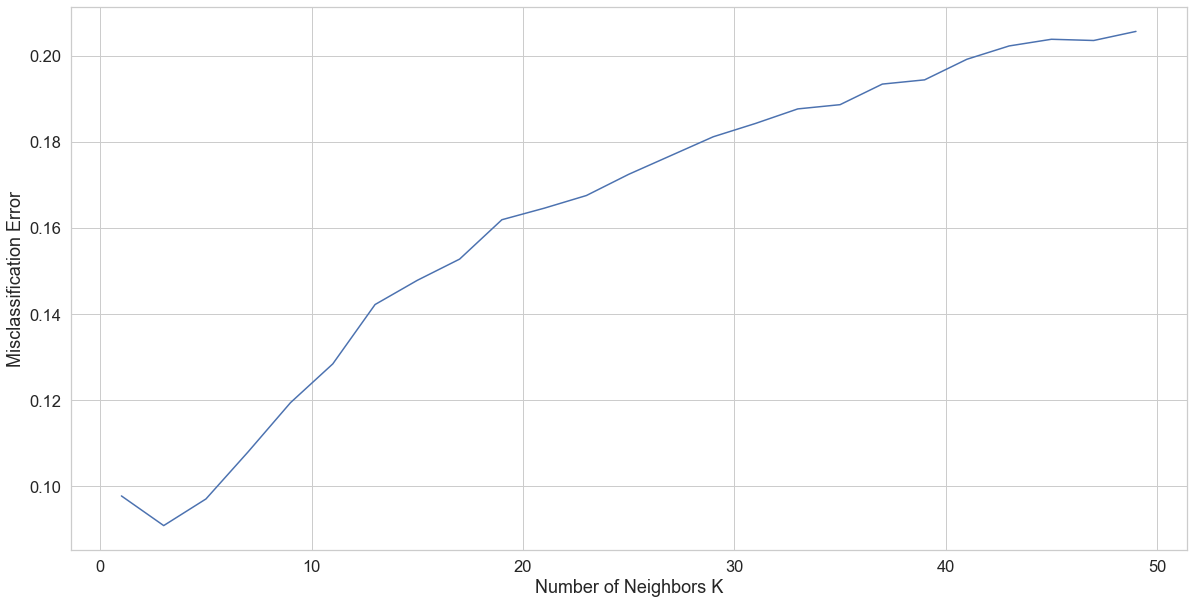

In [23]:
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
neighbors = list(range(1, 50, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()





In [24]:
import matplotlib


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
h = 0.2

knn = KNeighborsClassifier(3,weights='distance')
knn.fit(X_train,y_train)

knn_predict = knn.predict(X_test)
print("Predicted: ",knn_predict[:20])
print("Actual:    ",np.array(y_test[:20]))
print("Accuracy Percentage: " ,accuracy_score(y_true = y_test, y_pred = knn_predict)*100)



Predicted:  [1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1]
Actual:     [1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1]
Accuracy Percentage:  90.59684684684684


## Decision Tree model

Predicted:  [1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1]
Actual:     [1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1]
Accuracy Percentage:  95.32657657657657


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



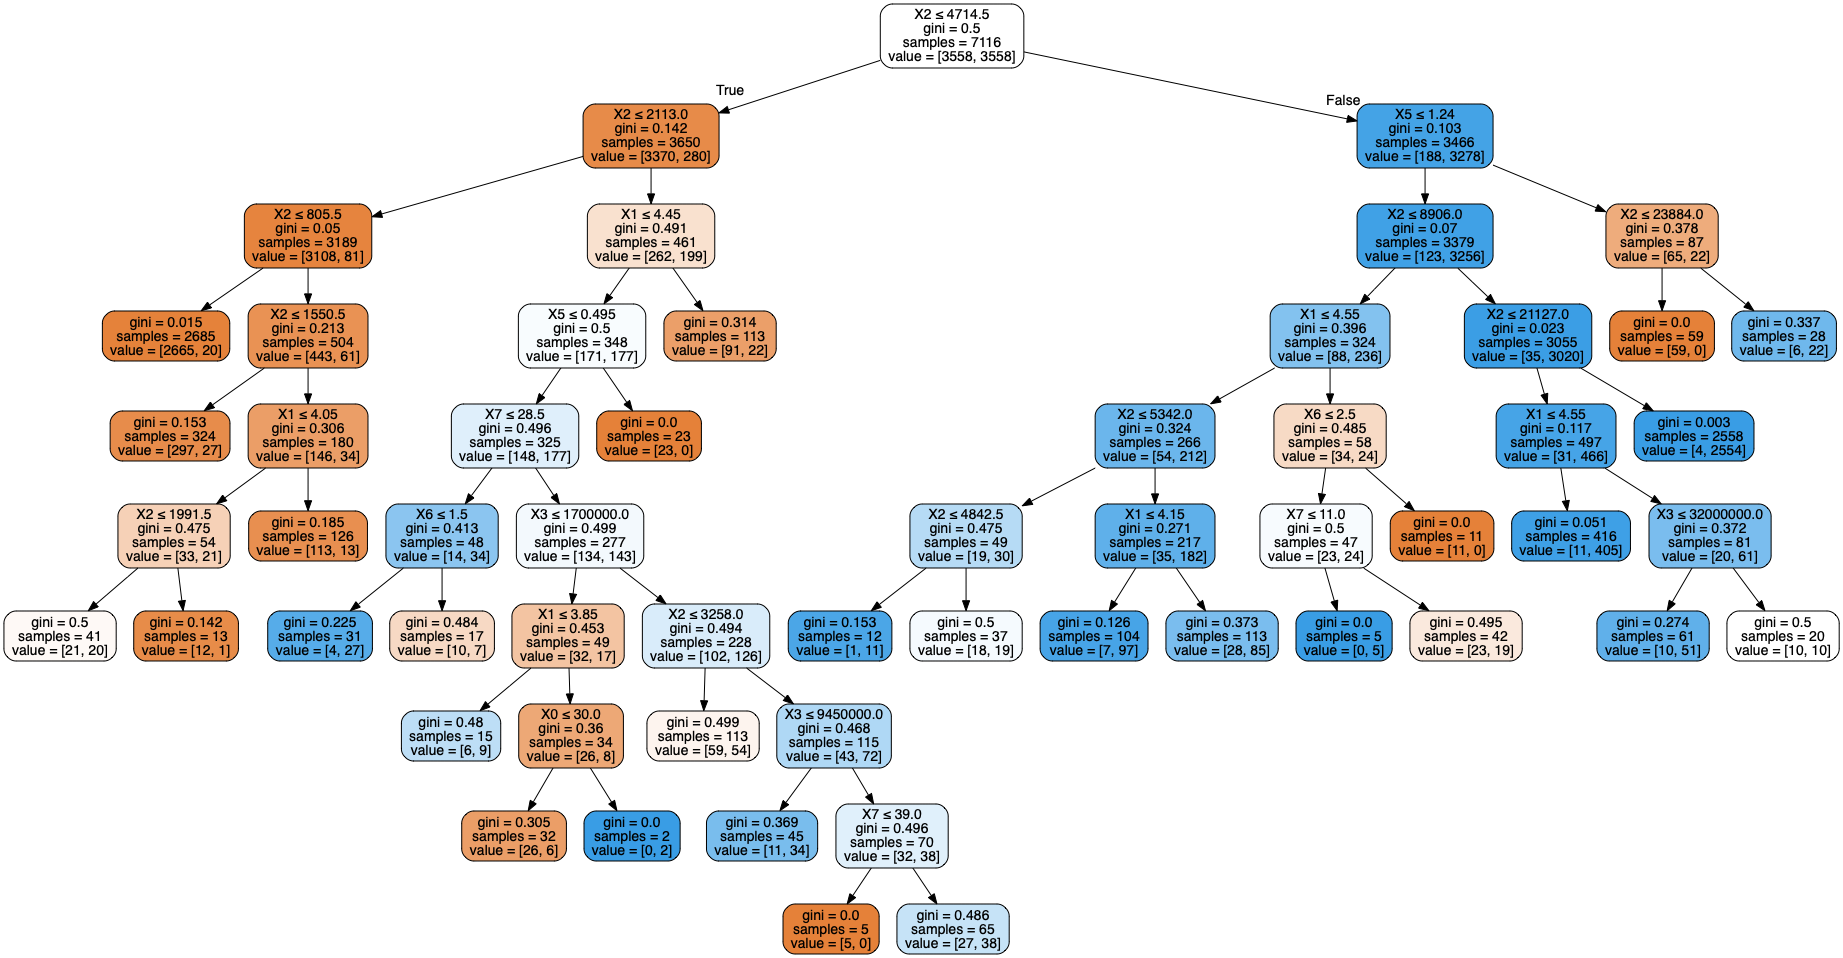

In [25]:
tree_model = DecisionTreeClassifier(max_leaf_nodes=29, random_state=0)


tree_model.fit(X_train, y_train)
predictions = tree_model.predict(X_test)
print("Predicted: ",predictions[:20])
print("Actual:    ",np.array(y_test[:20]))
print("Accuracy Percentage: " ,accuracy_score(y_true = y_test, y_pred = predictions)*100)



from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Logistic Regression

In [26]:

lg_model = LogisticRegression().fit(X_train,y_train)
lg_predict = lg_model.predict(X_test)

print("Predicted: ",lg_predict[:10])
print("Actual: ",np.array(y_test[:10]))
print("Accuracy Percentage: ",accuracy_score(y_true=y_test,y_pred = lg_predict)*100)



Predicted:  [1 1 0 1 0 0 0 1 1 0]
Actual:  [1 1 0 1 0 0 0 1 1 0]
Accuracy Percentage:  89.86486486486487


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

